# Analysis of #takebackcontrol on Twitter

Scraped tweets over a 2 days timeframe

In [ ]:
import ast
import pandas as pd
import datetime
import collections
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

df = pd.read_csv('takebackcontrol_boris.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = 100

In [2]:
df.sample(10)

,created_at,tweet_id,tweet_text,screen_name,name,account_creation_date,location,user_description,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,hashtags,hashtags_user_descriptions,hashtags_tweet_text
9452,17/10/2019 09:42,1.18477E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,micke_lfc,Michael Ivarsson,Sun Nov 14 18:57:57 +0000 2010,"Malmö, Sweden",NaN,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[]
6424,17/10/2019 10:26,1.18478E+18,"RT @BorisJohnson: This new deal ensures that we #TakeBackControl of our laws, borders, money and...",Russ99067626,Russ,Thu Sep 12 18:12:44 +0000 2019,NaN,NaN,"This new deal ensures that we #TakeBackControl of our laws, borders, money and trade without dis...",BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 10:24,01/04/2015 20:15,[],[],['TakeBackControl']
6104,17/10/2019 10:28,1.18478E+18,RT @BorisJohnson: We will leave the EU’s Customs Union as one United Kingdom and be able to stri...,HullensianChris,Chris,Thu Sep 19 08:49:31 +0000 2019,NaN,Descendent of Gengis Khan.,We will leave the EU’s Customs Union as one United Kingdom and be able to strike trade deals all...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 10:26,01/04/2015 20:15,[],[],['GetBr']
11117,15/10/2019 17:15,1.18416E+18,RT @BENEFITS_NEWS: #TakeBackControl - #UsNotYouBoris \n\nPeople won't be able to handle more yea...,s9tmt,Theresa Travis,Fri Apr 08 18:55:55 +0000 2011,manchester,"Volunteer SRFT,Co Founder Headsmatter,Passionate about Brain Injury,PTSD All views are my own",#TakeBackControl - #UsNotYouBoris \n\nPeople won't be able to handle more years of rotten CONS! ...,BENEFITS_NEWS,United Kingdom,'Austerity' Has Hit The Vulnerable The Hardest. We Rant At Gov. Because We See What Harm Their P...,15/10/2019 14:56,30/01/2016 04:14,[],[],"['TakeBackControl', 'UsNotYouBoris']"
6521,17/10/2019 10:26,1.18478E+18,"RT @BorisJohnson: This new deal ensures that we #TakeBackControl of our laws, borders, money and...",pounitedkingdom,ぽお,Wed Jul 31 10:34:18 +0000 2019,NaN,🇯🇵🇬🇧その他いろいろあれこれぶつぶつ,"This new deal ensures that we #TakeBackControl of our laws, borders, money and trade without dis...",BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 10:24,01/04/2015 20:15,[],[],['TakeBackControl']
5569,17/10/2019 10:33,1.18478E+18,"RT @BorisJohnson: This new deal ensures that we #TakeBackControl of our laws, borders, money and...",politicaldrago1,#freetheislingtonone,Tue Jul 23 18:35:45 +0000 2019,NaN,welsh political commentator,"This new deal ensures that we #TakeBackControl of our laws, borders, money and trade without dis...",BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 10:24,01/04/2015 20:15,[],[],['TakeBackControl']
8393,17/10/2019 09:51,1.18477E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,gklein_klein,Klein,Fri Jan 30 01:05:04 +0000 2015,NaN,"ik wil met spoed nederland uit, nederland is nederland niet meer, anti EU van VVD naar PVV wel v...",We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[]
434,17/10/2019 12:51,1.18

In [3]:
df['tweet_text'].value_counts().head(20)

RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Saturday so we can move on…            7326
RT @BorisJohnson: This new deal ensures that we #TakeBackControl of our laws, borders, money and trade without disruption &amp; establishes a n…       1327
RT @BorisJohnson: The anti-democratic backstop has been abolished. The people of Northern Ireland will be in charge of the laws that they l…            477
RT @BorisJohnson: We will leave the EU’s Customs Union as one United Kingdom and be able to strike trade deals all around the world. #GetBr…            388
RT @BorisJohnson: This is a deal which allows us to get Brexit done and leave the EU in two weeks’ time, so we can then focus on the people…            289
RT @BorisJohnson: This new deal takes back control. Under the previous negotiation, Brussels maintained ultimate control and could have for…            271
RT @AmandeepBhogal: Undemocratic backstop abolished\nWe leave EU

In [4]:
df = df[df['tweet_text'].str.contains("got a great new deal that takes back control")]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7426 entries, 3 to 10916
Data columns (total 17 columns):
created_at                          7426 non-null object
tweet_id                            7426 non-null object
tweet_text                          7426 non-null object
screen_name                         7426 non-null object
name                                7426 non-null object
account_creation_date               7426 non-null object
location                            5201 non-null object
user_description                    6056 non-null object
original_tweet_text                 7410 non-null object
original_tweet_user_screen_name     7410 non-null object
original_tweet_user_location        7330 non-null object
original_tweet_user_description     7410 non-null object
original_tweet_user_created_at      7410 non-null object
original_user_account_created_at    7410 non-null object
hashtags                            7426 non-null object
hashtags_user_descriptions          7

In [6]:
# new data frame with split value columns 
new = df["created_at"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["Date"]= new[0] 
  
# making separate last name column from new data frame 
df["Time"]= new[1] 

In [7]:
df.tail()

,created_at,tweet_id,tweet_text,screen_name,name,account_creation_date,location,user_description,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,hashtags,hashtags_user_descriptions,hashtags_tweet_text,Date,Time
10912,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,WestHamPlace,West Ham Place,Thu Jan 28 11:38:11 +0000 2016,"London, England","The place for all things West Ham. News,previews, gossip and more. RTs not always endorsements. ...",We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,['COYI'],['COYI'],[],17/10/2019,09:35
10913,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,JayVtid,JayUTV,Thu May 03 07:55:29 +0000 2018,"Birmingham, England",Football Mad | Betting Man | AVFC Fan #VTID,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,['VTID'],['VTID'],[],17/10/2019,09:35
10914,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,KwabenaKwaben15,Mark,Sun May 08 22:27:17 +0000 2016,"West Midlands, England",NaN,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[],17/10/2019,09:35
10915,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,faidr,Kostas Kalotychos,Mon Dec 13 00:39:04 +0000 2010,"Athens, Greece","Greek, French, English. Bookmarks (in love/like sign)",We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[],17/10/2019,09:35
10916,17/10/2019 09:35,1.18476E+18,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,Boris Johnson,Wed Apr 01 20:15:49 +0000 2015,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],17/10/2019,09:35


In [8]:
df.sort_values("Time", ascending=True).head()

,created_at,tweet_id,tweet_text,screen_name,name,account_creation_date,location,user_description,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,hashtags,hashtags_user_descriptions,hashtags_tweet_text,Date,Time
10916,17/10/2019 09:35,1.18476E+18,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,Boris Johnson,Wed Apr 01 20:15:49 +0000 2015,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],17/10/2019,09:35
10863,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,TheSile49562521,The Silent Majority,Sun Sep 29 14:52:15 +0000 2019,"England, United Kingdom","Pissed off with Parliament, hypocrisy and faux offense. looking for some common sense in a PC wo...",We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[],17/10/2019,09:35
10864,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,Matt_Morrison94,Matthew Morrison,Sun Jan 22 17:45:03 +0000 2012,Northern Ireland,"Public Affairs @mcenewsfeed. Interested in politics, business and entrepreneurship.",We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[],17/10/2019,09:35
10865,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,ruairidh_kerr,Ruairidh Kerr,Mon Apr 29 14:21:54 +0000 2019,"London, England","On here for the politics, Scottish, Londoner, Pro Brexit, Libertarian / liberal, Unionist, PhD i...",We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[],17/10/2019,09:35
10866,17/10/2019 09:35,1.18476E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,masedi_mothusi,Mothusibw,Sat Mar 01 05:34:04 +0000 2014,Botswana,I am not a Russian Bot,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[],17/10/2019,09:35


In [9]:
df.dtypes

created_at                          object
tweet_id                            object
tweet_text                          object
screen_name                         object
name                                object
account_creation_date               object
location                            object
user_description                    object
original_tweet_text                 object
original_tweet_user_screen_name     object
original_tweet_user_location        object
original_tweet_user_description     object
original_tweet_user_created_at      object
original_user_account_created_at    object
hashtags                            object
hashtags_user_descriptions          object
hashtags_tweet_text                 object
Date                                object
Time                                object
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.head()

,created_at,tweet_id,tweet_text,screen_name,name,account_creation_date,location,user_description,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,hashtags,hashtags_user_descriptions,hashtags_tweet_text,Date,Time
3,17/10/2019 13:11,1.18482E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,notkristinj,🌙 NQT 𝚔𝚛𝚒𝚜𝚝𝚒𝚗𝚓🗽⚖️,Sat Nov 22 00:01:21 +0000 2014,"Orange County, Ca","O.C. Roller Derby Rollergirl, loyal Trump supporter, Unapologetic patriot, Truth not propaganda,...",We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,"['Americafirst', 'MAGA']","['Americafirst', 'MAGA']",[],2019-10-17,13:11
4,17/10/2019 13:11,1.18482E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,peterbellward,peter bellward,Mon Jun 10 20:21:46 +0000 2013,NaN,NaN,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,[],[],[],2019-10-17,13:11
9,17/10/2019 13:11,1.18482E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,KutybaJeffrey,Jeffrey Kutyba,Thu Apr 05 03:32:11 +0000 2018,"Eau Claire, WI",U.S. Marine O313/0311 Infantry- in U.S. Army-11B infantry-many tours in combat Patriot till I di...,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,['Decorated'],['Decorated'],[],2019-10-17,13:11
12,17/10/2019 13:10,1.18482E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,2016Ivotedleave,Enoch Powell,Fri Nov 14 23:16:43 +0000 2014,NaN,Turning in my grave.,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 12:08,01/04/2015 20:15,[],[],[],2019-10-17,13:10
13,17/10/2019 13:10,1.18482E+18,RT @BorisJohnson: We’ve got a great new deal that takes back control — now Parliament should get...,sarahandrews77,Sarah A,Thu Jul 02 08:56:59 +0000 2009,worcestershire UK,#BritishIndependence #Brexit #WTO 🇬🇧🏴󠁧󠁢󠁥󠁮󠁧󠁿🏴󠁧󠁢󠁷󠁬󠁳󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🇮🇪 🇺🇸 3 long years- is the end in sight...,We’ve got a great new deal that takes back control — now Parliament should get Brexit done on Sa...,BorisJohnson,United Kingdom,Prime Minister of the United Kingdom and @Conservatives leader. MP for Uxbridge and South Ruislip.,17/10/2019 09:35,01/04/2015 20:15,"['BritishIndependence', 'Brexit', 'WTO']","['BritishIndependence', 'Brexit', 'WTO']",[],2019-10-17,13:10


In [11]:
df.dtypes

created_at                                  object
tweet_id                                    object
tweet_text                                  object
screen_name                                 object
name                                        object
account_creation_date                       object
location                                    object
user_description                            object
original_tweet_text                         object
original_tweet_user_screen_name             object
original_tweet_user_location                object
original_tweet_user_description             object
original_tweet_user_created_at              object
original_user_account_created_at            object
hashtags                                    object
hashtags_user_descriptions                  object
hashtags_tweet_text                         object
Date                                datetime64[ns]
Time                                        object
dtype: object

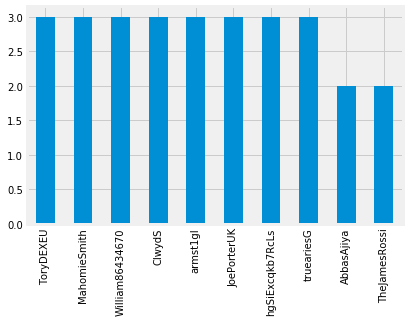

In [12]:
df['screen_name'].value_counts().head(10).plot(kind='bar')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0, flags=flags)


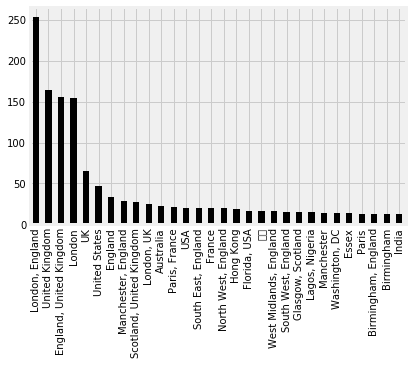

In [13]:
df['location'].value_counts().head(30).plot(kind='bar',x='location',y='number', color ='black')

NameError: name 'white' is not defined

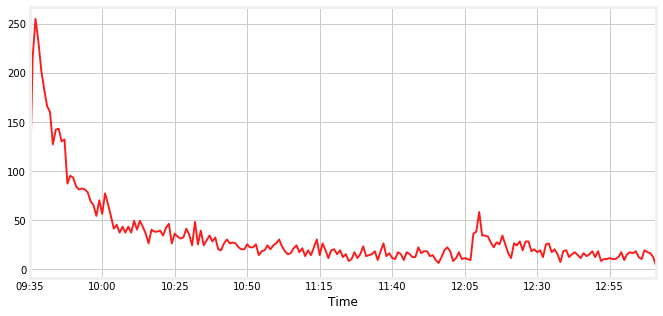

In [14]:
df['Time'] = pd.to_datetime(df['Time']).apply(lambda x: x.strftime('%H:%M'))
seconds = df.groupby('Time').Time.count()
ax = seconds.plot(figsize=(10, 5), color='red', linewidth=1.9, alpha=0.9)
ax.set_facecolor('xkcd:white')
ax.set_facecolor((white, white, white))
ax.patch.set_facecolor('xkcd:mint green')

In [ ]:
df.to_csv('seconds.csv', index = None, header=True)

In [ ]:
export_csv = seconds.to_csv('seconds.csv', index = None, header=True)

In [16]:
def hashing(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_user_descriptions', 'number']).head(50).sort_values('number', ascending=False)
    return df

In [17]:
tags1 = hashing(df.hashtags_user_descriptions)
tags1
export_csv = tags1.to_csv('hash.csv', index = None, header=True)
    

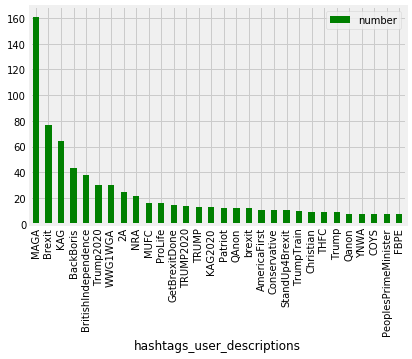

In [18]:
tags1 = hashing(df.hashtags_user_descriptions).head(30).plot(kind='bar',x='hashtags_user_descriptions',y='number', color ='green')

In [19]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

def parsing(row):
    text = re.sub('[^a-zA-Z]', ' ', str(row['user_description']))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

df['user_description'] = df.apply(parsing, axis=1)

ModuleNotFoundError: No module named 'nltk'

In [ ]:
freq = pd.Series(' '.join(df['user_description']).split()).value_counts()[:20]
freq

In [ ]:
df.shape[0]
stop_words = set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "www", "com", "http", "twitter"]
stop_words = stop_words.union(new_words)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
corpus = []
for i in range(0, 300):
    text = df['user_description'][i]
    
    
#     ##Stemming
    ps=PorterStemmer()
#     #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=60,
                          max_font_size=100, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.head()

In [ ]:
df['account_creation_date'] = pd.to_datetime(df['account_creation_date']).apply(lambda x: x.strftime('%d-%m-%Y'))

In [ ]:
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])

In [ ]:
unique_feature = 'screen_name'
key = 'account_creation_date'
freq = 'w'

In [ ]:
# getting unique accounts
unique_accts = df.drop_duplicates(subset=unique_feature)
unique_counts = unique_accts.groupby(pd.Grouper(key=key, freq=freq)).count()[unique_feature]

In [ ]:
unique_counts.sort_values(ascending=False).head(50)

In [ ]:
def getMonth(s):
  return s.split("-")[1]

def getDay(s):
  return s.split("-")[0]

def getYear(s):
  return s.split("-")[2]

def getYearMonth(s):
  return s.split("-")[1]+"-"+s.split("-")[2]

In [ ]:
#efficient way to extract year from string format date
df['account_creation_year'] = pd.DatetimeIndex(df['account_creation_date']).year

In [ ]:
df['account_creation_year'].value_counts().head(10)

In [ ]:
#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
df['account_creation_month_year'] = pd.to_datetime(df['account_creation_date']).dt.to_period('M')
df.head()

In [15]:
df['account_creation_month_year'].value_counts().head(200)

KeyError: 'account_creation_month_year'